In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from matplotlib.gridspec import GridSpec
from tqdm.notebook import tqdm
from scipy import stats

In [3]:
# c0 = mock1['gal_type'] == 'centrals'
# c1 = mock1['gal_type'] == 'active_satellites'
# c2 = mock1['gal_type'] == 'quiescent_satellites'

# cen = mock1.loc[c0]
# act = mock1.loc[c1]
# qui = mock1.loc[c2]


In [10]:
# tt = mock1[['x','y','z']]
# tt.to_csv(r'/home/jin/바탕화면/FCFC-main/mock1.txt',index=False,sep='\t')
# x = mock1['x'] 
# y = mock1['y']
# z = mock1['z']
# DR_x = stats.uniform(x.min(),x.max()).rvs(len(x)*10)
# DR_y = stats.uniform(y.min(),y.max()).rvs(len(y)*10)
# DR_z = stats.uniform(z.min(),z.max()).rvs(len(z)*10)

# RR = pd.DataFrame() ## 1. 데이터 초기화
# RR['X'] = DR_x
# RR['Y'] = DR_y
# RR['Z'] = DR_z 
# RR.to_csv(r'/home/jin/바탕화면/FCFC-main/mock1_RR.txt',index=False,sep='\t')

In [6]:
# tt = mock2[['x','y','z']]
# tt.to_csv(r'/home/jin/바탕화면/FCFC-main/mock2.txt',index=False,sep='\t')
# x = mock2['x'] 
# y = mock2['y']
# z = mock2['z']
# DR_x = stats.uniform(x.min(),x.max()).rvs(len(x)*10)
# DR_y = stats.uniform(y.min(),y.max()).rvs(len(y)*10)
# DR_z = stats.uniform(z.min(),z.max()).rvs(len(z)*10)

# RR = pd.DataFrame() ## 1. 데이터 초기화
# RR['X'] = DR_x
# RR['Y'] = DR_y
# RR['Z'] = DR_z 
# RR.to_csv(r'/home/jin/바탕화면/FCFC-main/mock2_RR.txt',index=False,sep='\t')

In [7]:
# tt = mock3[['x','y','z']]
# tt.to_csv(r'/home/jin/바탕화면/FCFC-main/mock3.txt',index=False,sep='\t')
# x = mock3['x'] 
# y = mock3['y']
# z = mock3['z']
# DR_x = stats.uniform(x.min(),x.max()).rvs(len(x)*10)
# DR_y = stats.uniform(y.min(),y.max()).rvs(len(y)*10)
# DR_z = stats.uniform(z.min(),z.max()).rvs(len(z)*10)

# RR = pd.DataFrame() ## 1. 데이터 초기화
# RR['X'] = DR_x
# RR['Y'] = DR_y
# RR['Z'] = DR_z 
# RR.to_csv(r'/home/jin/바탕화면/FCFC-main/mock3_RR.txt',index=False,sep='\t')

In [13]:
# RR.to_csv(r'/home/jin/바탕화면/FCFC-main/mock1_RR.txt',index=False,sep='\t')

array([ 35.097164,  34.030483,  11.709581, ..., 189.468781, 175.221924,
       175.379547])

In [4]:
mock1 = pd.read_csv(r'/home/jin/다운로드/mock_1_tinker13_threshold2_z_0.695_fullbox.txt',delim_whitespace=True)
# mock2 = pd.read_csv(r'/home/jin/다운로드/mock_2_tinker13_threshold2_z_0.695_fullbox.txt',delim_whitespace=True)
# mock3 = pd.read_csv(r'/home/jin/다운로드/mock_3_tinker13_threshold2_z_0.695_fullbox.txt',delim_whitespace=True)
header = ['x','y','z','vx','vy','vz','gal_type','halo_num_centrais','central_sfr_designation','sfr_designation','halo_num_active_satellites','halo_num_quiescent_satellite','halo_id','halo_mvir','halo_rvir']
mock1.columns = header
# mock2.columns = header
# mock3.columns = header

In [65]:

def dist(x1,x2,y1,y2,z1,z2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
bins = np.linspace(0,200,40)

dd_n = 0
dr_n = 0

jj = [0]
dj =1000
xi = 0
ff = 0

for rr,mm in tqdm(enumerate(jj)):
    ll = (xx['x'] < mm +dj).__and__(xx['x'] >= mm).__and__(xx['y'] < 500).__and__(xx['y'] >=0).__and__(xx['z'] <500).__and__(xx['z'] >=0) 
    tt = xx.loc[ll]
    x ,y ,z = tt['x'].to_numpy() , tt['y'].to_numpy() , tt['z'].to_numpy() 
    for ii in tqdm(range(len(x))): # range(len(x_0))
        dd = dist(x[ii],x[ii+1:],y[ii],y[ii+1:],z[ii],z[ii+1:])
        kk = pd.cut(dd,bins)
        dd_n += kk.describe()['counts']

    DR_x = stats.uniform(x.min(),x.max()).rvs(len(x)*5)
    DR_y = stats.uniform(y.min(),y.max()).rvs(len(y)*5)
    DR_z = stats.uniform(z.min(),z.max()).rvs(len(z)*5)



    for ii in tqdm(range(len(DR_x))):
        dr = dist(DR_x[ii],DR_x[ii+1:],DR_y[ii],DR_y[ii+1:],DR_z[ii],DR_z[ii+1:])
        kk = pd.cut(dr,bins)
        dr_n += kk.describe()['counts']
    nndr = (len(DR_x)*(len(DR_x)-1))
    nndd = (len(x)*(len(x)-1))
    nor = nndr/nndd
    ff = nor*(dd_n/dr_n) -1
    xi += ff

ss = (bins[1:] + bins[:-1])/2 
plt.plot(ss,xi*ss*ss,'ro')

0it [00:00, ?it/s]

  0%|          | 0/9855 [00:00<?, ?it/s]

  0%|          | 0/49275 [00:00<?, ?it/s]

ValueError: operands could not be broadcast together with shapes (40,) (39,) 

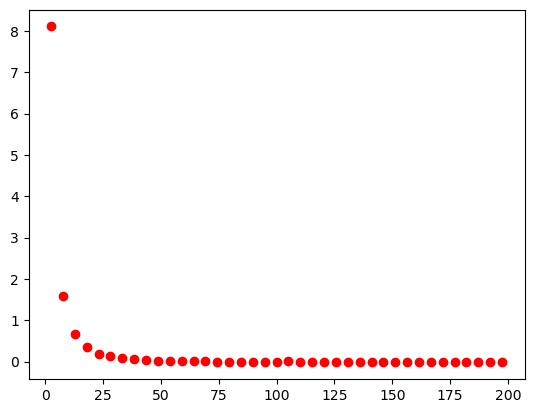

In [68]:
ss = (bins[1:] + bins[:-1])/2 
ss = np.append(ss,200)

plt.plot(ss,xi,'ro')

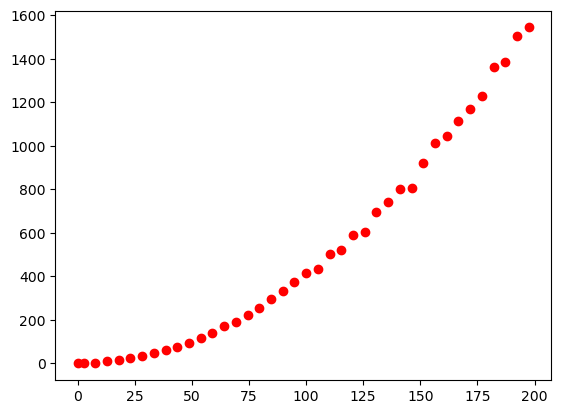

In [49]:
ss = (bins[1:] + bins[:-1])/2 
ss = np.append(0,ss)

plt.plot(ss,xx*ss*ss,'ro')

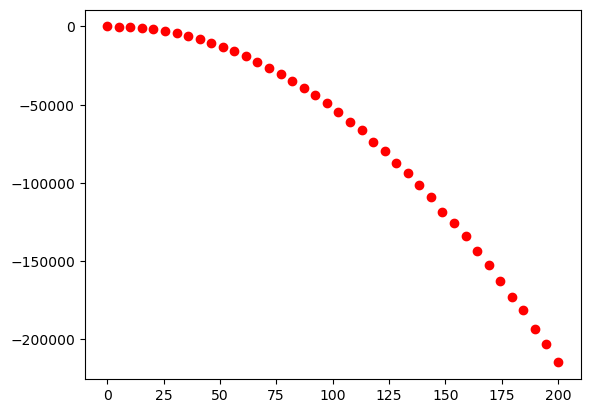

In [45]:
# xi = ff.mean(axis=0)
# xi
ff =ff-1
xi = ff.mean(axis=0)
ss = (bins[1:] + bins[:-1])/2 
ss = np.append(0,ss)

plt.plot(bins,xi*ss*ss,'ro')

In [83]:
xi

array([ 9.38694036,  1.99500027,  0.92915319,  0.57305321,  0.40188535,
        0.33046649,  0.26669049,  0.2323663 ,  0.21040991,  0.19569904,
        0.19517756,  0.18938386,  0.17670003,  0.18511402,  0.16952077,
        0.16167376,  0.16329495,  0.16370807,  0.16732687,  0.16163098,
        0.16632987,  0.16044541,  0.15959443,  0.15747005,  0.15702339,
        0.15169432,  0.14829311,  0.14800154,  0.14832106,  0.15133225,
        0.14888757,  0.14730332,  0.14535323,  0.14147891,  0.14314086,
        0.14233873,  0.13519814,  0.13515915,  0.134694  , -0.02181195])

In [75]:
xi

array([ 9.52342167,  1.91845853,  0.87884987,  0.57003227,  0.40235788,
        0.31569734,  0.25972516,  0.22654594,  0.209056  ,  0.19230987,
        0.19271223,  0.19097852,  0.17629257,  0.17960746,  0.17037424,
        0.16989739,  0.16853164,  0.16855684,  0.17071266,  0.17111911,
        0.17082397,  0.16614441,  0.16570188,  0.16592048,  0.16519027,
        0.16025931,  0.16093883,  0.16122395,  0.16071453,  0.16355542,
        0.16195264,  0.16243785,  0.16396925,  0.15875369,  0.16134326,
        0.16088572,  0.15685093,  0.15785232,  0.15689759, -0.0121982 ])

In [ ]:
dd_n =  dd_n
dr_n =  dr_n
# x ,y ,z = tt['x'].to_numpy() , tt['y'].to_numpy() , tt['z'].to_numpy() 
ff = (dd_n/dr_n)

ff = pd.DataFrame()
ff.to_csv(r'/home/jin/바탕화면/2PCF_x_0_3000Mpc.txt',index=False,sep='\t')

# RR = pd.DataFrame() ## 1. 데이터 초기화
# RR['X'] = DR_x
# RR['Y'] = DR_y
# RR['Z'] = DR_z 
# RR.to_csv(r'/home/jin/바탕화면/FCFC-main/mock3_RR.txt',index=False,sep='\t')

# xi = ff/nor -1
# xi = xi['counts'].dropna()

In [24]:
dr_n = 0 
x ,y ,z = tt['x'].to_numpy() , tt['y'].to_numpy() , tt['z'].to_numpy() 
DR_x = stats.uniform(x.min(),x.max()).rvs(len(x)*5)
DR_y = stats.uniform(y.min(),y.max()).rvs(len(y)*5)
DR_z = stats.uniform(z.min(),z.max()).rvs(len(z)*5)

DR_x0 = DR_x 
DR_y0 = DR_y 
DR_z0 = DR_z 

for i in tqdm(range(len(DR_x0))):
    DR_xi = DR_x0[i]
    DR_yi = DR_y0[i]
    DR_zi = DR_z0[i]

    DR_x = np.delete(DR_x ,0,0)
    DR_y  = np.delete(DR_y,0,0)
    DR_z = np.delete(DR_z,0,0)

    dr = dist(DR_xi,DR_x,DR_yi,DR_y,DR_zi,DR_z)
    kk = pd.cut(dr,bins)
    dr_n += kk.describe()



  0%|          | 0/400960 [00:00<?, ?it/s]

NameError: name 'dd_r' is not defined

In [27]:
x ,y ,z = tt['x'].to_numpy() , tt['y'].to_numpy() , tt['z'].to_numpy() 

In [40]:
ff = ((dd_n/dr_n)['counts'] -1 )
ff[1]

0.23529411764705888

In [14]:
# x ,y ,z = tt['x'].to_numpy() , tt['y'].to_numpy() , tt['z'].to_numpy() 
ff = (dd_n/dr_n)
nor = (len(x)*(len(x)-1))/(((len(x)*3)*(len(x)*3-1)))


xi = ff/nor -1
xi = xi['counts'].dropna()
bins = np.linspace(0,200,40)
ss = (bins[1:] + bins[:-1])/2

0.03587920210854012

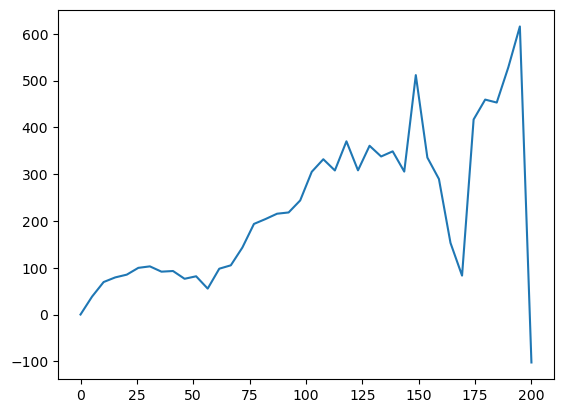

In [15]:
plt.plot(bins,bins*bins*xi)